# Clustering

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
dateparse = lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S%z")  # pd.datetime.strptime

core_users_clustering = pd.read_csv("../data/core_users_clustering.csv",
                    parse_dates=['created_at'],
                    converters={"user_id": str})

In [66]:
core_users_clustering_copy = core_users_clustering.copy()

## K-Means

### Data preprocessing

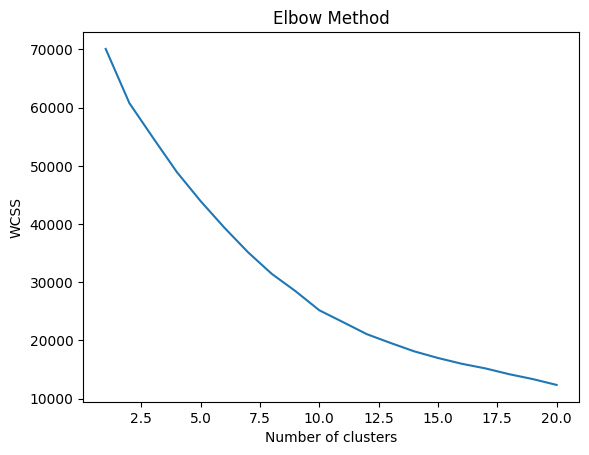

In [85]:
# Seleziona le caratteristiche da utilizzare per il clustering
features = ['nbr_followers', 'nbr_followings', 'nbr_liked_tweets', 'nbr_lists', 'nbr_tweets', 'nbr_usernames', 'following_ratio', 'followers_ratio', 'favorites_ratio', 'tweet_ratio']

# Standardizzazione delle features
core_users_standardized = (core_users_clustering[features] - core_users_clustering[features].mean()) / core_users_clustering[features].std()
# Normalizzazione delle features
# core_users_normalized = (core_users_clustering[features] - core_users_clustering[features].min()) / (core_users_clustering[features].max() - core_users_clustering[features].min())

# Sostituisci i valori mancanti con 0
core_users_standardized = core_users_standardized.fillna(0)

# Calcola la WCSS per diverse quantità di cluster
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=0).fit(core_users_standardized)
    wcss.append(kmeans.inertia_)

# Visualizza la WCSS in funzione del numero di cluster
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applica PCA
pca = PCA(n_components=2)
core_users_pca = pca.fit_transform(core_users_standardized)


### K-Means algorithm

C:\Users\davis\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


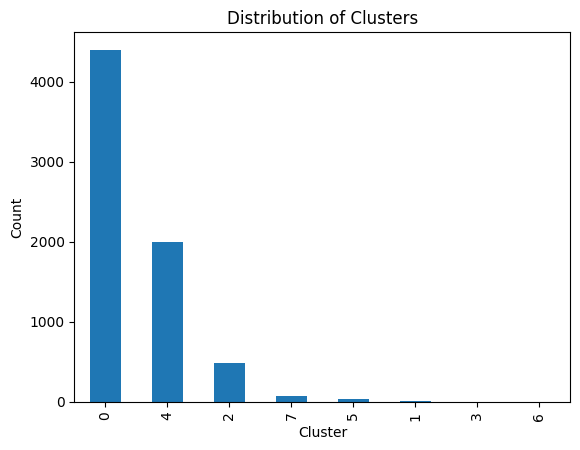

In [76]:
# Esegui il clustering K-means
kmeans = KMeans(n_clusters=8, random_state=0).fit(core_users_pca)

# Aggiungi le etichette dei cluster ai dati
core_users_clustering['kmeans_cluster'] = kmeans.labels_

# Visualizza la distribuzione dei cluster
core_users_clustering['kmeans_cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Clusters')
plt.show()


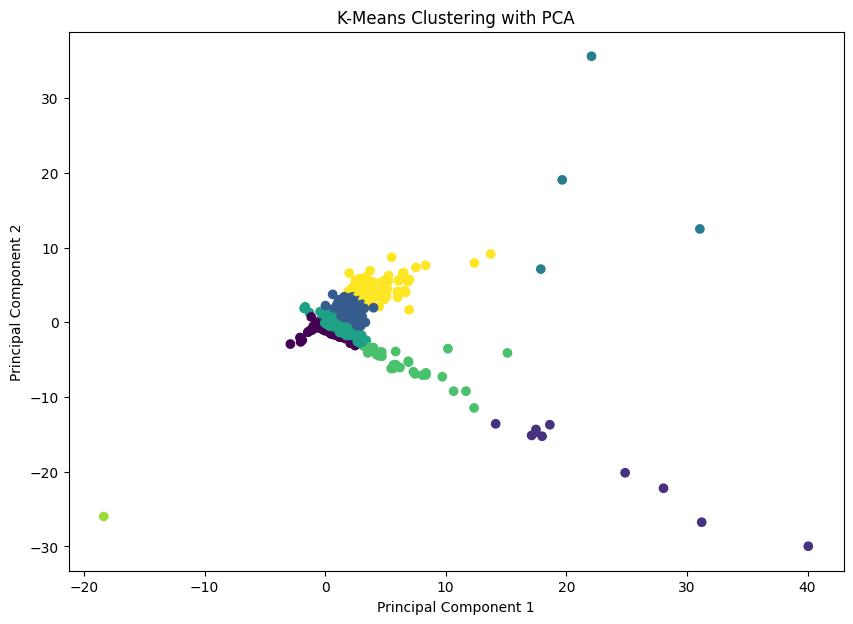

In [77]:
# Creiamo uno scatter plot
plt.figure(figsize=(10, 7))

# Coloriamo i punti in base al cluster a cui appartengono
plt.scatter(core_users_pca[:, 0], core_users_pca[:, 1], c=core_users_clustering['kmeans_cluster'], cmap='viridis')

plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


## DBSCAN

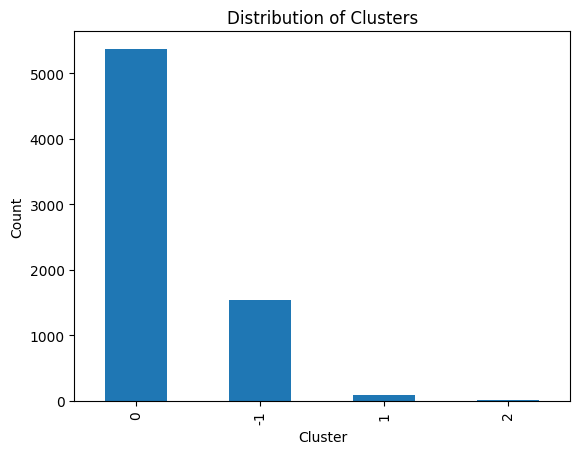

In [88]:
# Eseguiamo DBSCAN sui dati
db = DBSCAN(eps=0.3, min_samples=10).fit(core_users_standardized)

# Aggiungi le etichette dei cluster ai dati
core_users_clustering['db_cluster'] = db.labels_

# Visualizza la distribuzione dei cluster
core_users_clustering['db_cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Clusters')
plt.show()


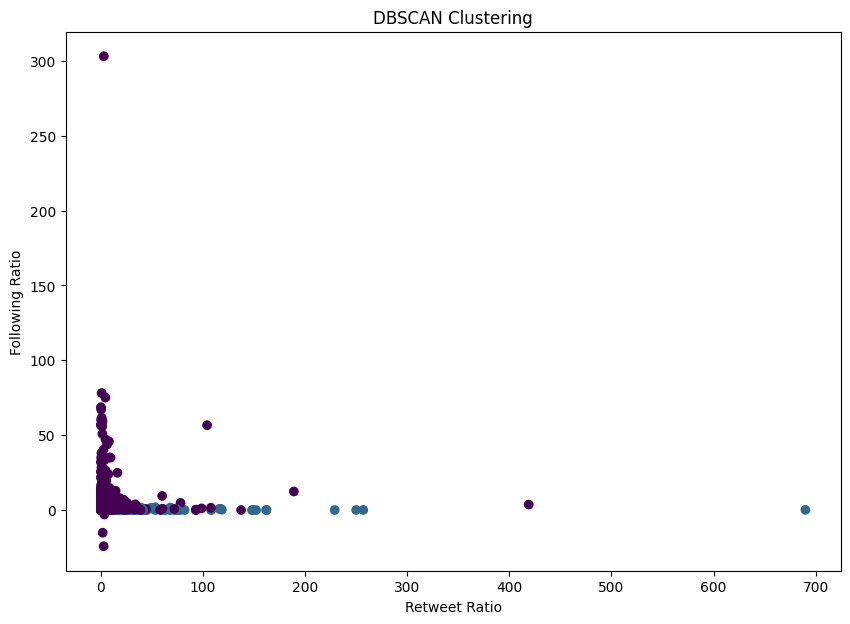

In [89]:
# Visualizziamo i risultati
plt.figure(figsize=(10, 7))
plt.scatter(core_users_clustering['retweet_ratio'], core_users_clustering['following_ratio'], c=core_users_clustering['db_cluster'])
plt.xlabel('Retweet Ratio')
plt.ylabel('Following Ratio')
plt.title('DBSCAN Clustering')
plt.show()

# # Creiamo uno scatter plot
# plt.figure(figsize=(10, 7))
# plt.scatter(core_users_pca[:, 0], core_users_pca[:, 1], c=core_users_clustering['db_cluster'], cmap='viridis')
# plt.title('DBSCAN Clustering with PCA')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()
